For this assignmnet I have made use of the fashion dataset from here: https://www.kaggle.com/zalando-research/fashionmnist

In [1]:
#  To mount the data from drive to google collab followed the following documentation: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
from sklearn.preprocessing import MinMaxScaler

In [3]:
downloaded = drive.CreateFile({'id':"1qvfgGy-NqSDdAGxiciXWM00VvFffo6WC"})
downloaded.GetContentFile('fashion-mnist.csv')

In [4]:
df = pd.read_csv('fashion-mnist.csv')
df.shape
df_umap=df.copy()
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,0,83,155,136,116,148,110,118,67,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,...,199,165,108,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,159,6,91,0,0,85,159,0,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,0,1,0,0,87,114,77,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,...,228,229,231,231,218,230,255,0,0,0,0,0,0,0,0,0,0,0,116,140,147,166,176,174,173,173,174,173,177,164,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


This dataset has 785 features and out of which I am picking 10 important features as shown below

In [5]:
from sklearn.model_selection import train_test_split

X, y = df.iloc[:, 1:].to_numpy(), df.iloc[:, 0].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train

array([[0, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

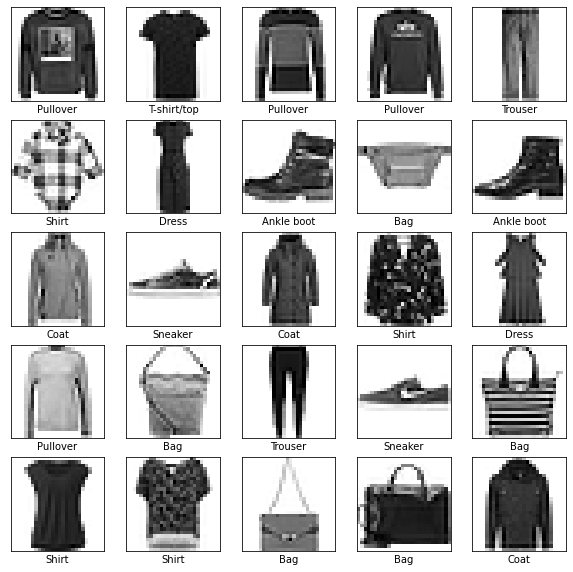

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap="binary")
    plt.xlabel(class_names[y_train[i]])
plt.show()

## PCA
For PCA I am reducting the 10 features to 4 features by grouping similar items together


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
X_reduced = pca.fit_transform(X_train)
X_reduced

array([[ 1540.66261374,  1145.89416764,   516.16390229,   446.93155319],
       [ 1691.28898962,  -757.67476162,  -622.45230465,   -27.06215609],
       [ 1501.24393615,   448.48216591,   565.44183127,   238.39970184],
       ...,
       [  365.08083816,  1414.21075268, -1490.42424551,   853.68978413],
       [ 1141.5702221 ,  -479.29549901,  -141.97329549,  -253.942593  ],
       [ 2113.95094698,   321.0279076 ,  -442.8354998 ,   297.03278049]])

In [ ]:
pca.explained_variance_ratio_[:10]

array([0.29001182, 0.17735104, 0.06021262, 0.04979453])

In [ ]:
pca = PCA(n_components = 4)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

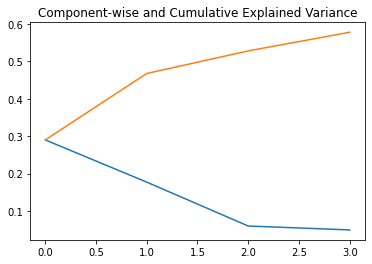

In [ ]:
plt.plot(range(4), pca.explained_variance_ratio_)
plt.plot(range(4), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

We can see that there is a stronmg negative correlation between the componets. This might be due to the upper and lower body items features

non-compressed image


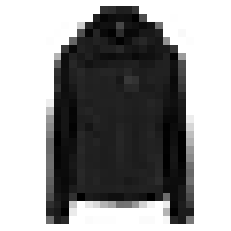

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

print('non-compressed image')
plt.imshow(X_train[100].reshape(28, 28), cmap="binary")
plt.axis("off")
plt.show()

95% variance compressed image


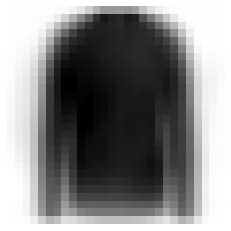

In [ ]:
print('95% variance compressed image')
plt.imshow(X_recovered[100].reshape(28, 28), cmap="binary")
plt.axis("off")
plt.show()


After reducing the features we can still recognize the shirt

In [ ]:
# helper function for plotting

from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import numpy as np

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("prism")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

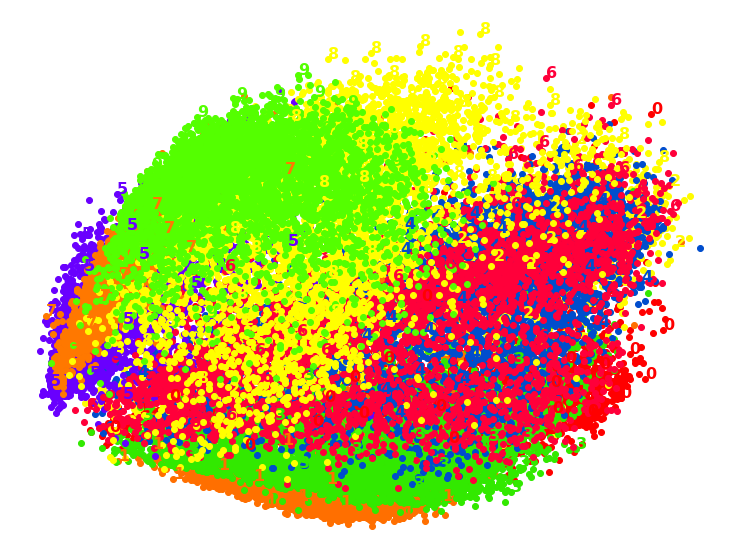

In [ ]:
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X_train)
plot_digits(X_pca_reduced, y_train)
plt.show()

PCA graph with 10 features grouped in 4 componets. This is good for linear values.

## Elbow

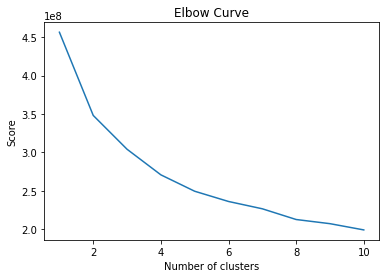

In [7]:
from sklearn.cluster import KMeans
SSE = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=1500,n_init=10,random_state=0)
    kmeans.fit(X_train[:100])
    SSE.append(kmeans.inertia_)
plt.plot(range(1,11),SSE)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

Through the elbow method we can find that the SSE score is high for 3 or 4 clusters

## SVD
Calculating SVD for 3 clusters given a good graph circular in shape. This is not suitable for Elliptic curves

In [ ]:
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components=3, random_state=42).fit_transform(X_train)

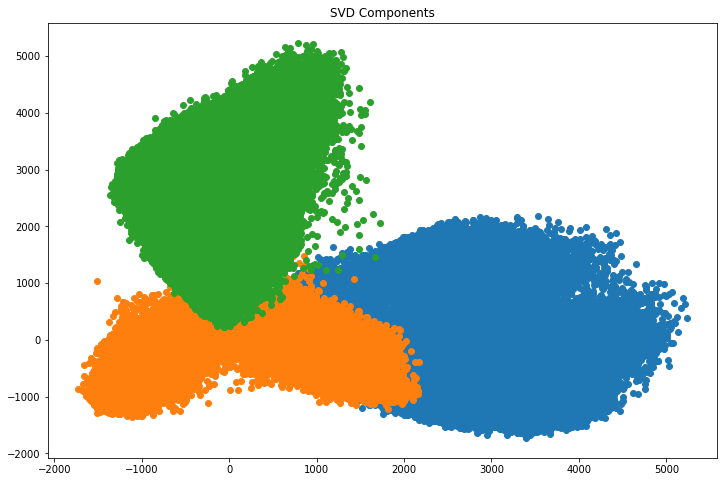

In [ ]:
plt.figure(figsize=(12,8))
plt.title('SVD Components')
plt.scatter(svd[:,0], svd[:,1])
plt.scatter(svd[:,1], svd[:,2])
plt.scatter(svd[:,2],svd[:,0])

## LLE
LLE is suitable for only linear graphs

In [ ]:
import matplotlib.patheffects as PathEffects
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [ ]:
x_subset = X_train[0:2000]
y_subset = y_train[0:2000]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.manifold import LocallyLinearEmbedding

import time
time_start = time.time()

fashion_lle = LocallyLinearEmbedding(random_state=42).fit_transform(x_subset)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 8.155345439910889 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(-0.010416329318195009, 0.021445642292464297, '0'),
  Text(0.06057789023445699, -0.00985905159932551, '1'),
  Text(-0.010629007254747734, 0.02156486473909222, '2'),
  Text(0.02221938786040202, 0.007015857772902516, '3'),
  Text(-0.010349663280855088, 0.021420080052561567, '4'),
  Text(-0.013143528217287061, -0.022215477724976545, '5'),
  Text(-0.010567553693489454, 0.021549209246975964, '6'),
  Text(-0.013314303312621536, -0.03412094785110616, '7'),
  Text(-0.009492212743156037, 0.003197503958433748, '8'),
  Text(-0.013294302963630272, -0.03288366669620715, '9')])

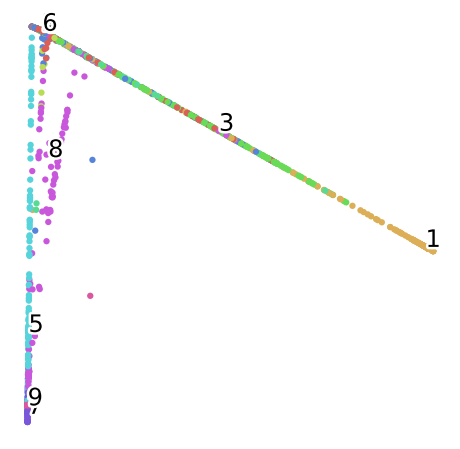

In [ ]:
fashion_scatter(fashion_lle, y_subset)

# t-SNE
t-sne is suited for problems with low dimensions. For the original data with 795 features t-sne would have not been accurate but for lower dimensions problem with 10 clean features t-sne is suited for both linear and non-linear data

In [ ]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

fashion_tsne = TSNE(random_state=42).fit_transform(x_subset)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 24.13447070121765 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(-22.555143, 20.816551, '0'),
  Text(10.028804, 50.297432, '1'),
  Text(-28.549877, -17.937399, '2'),
  Text(-6.675607, 33.246086, '3'),
  Text(-34.930885, -8.977522, '4'),
  Text(30.209435, -11.36244, '5'),
  Text(-20.762009, 0.24431504, '6'),
  Text(40.667427, -25.277384, '7'),
  Text(0.759851, -27.000595, '8'),
  Text(49.981773, 7.3242016, '9')])

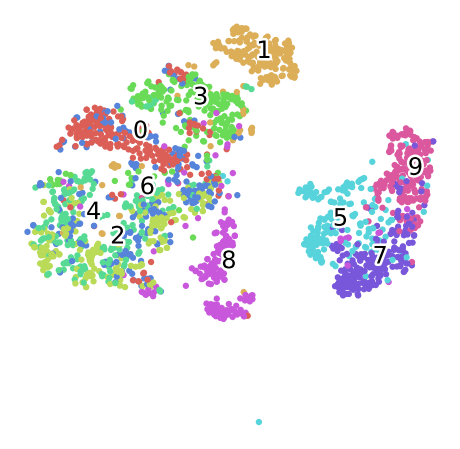

In [ ]:
fashion_scatter(fashion_tsne, y_subset)

## ISOMAP
ISOMAP defines the boundries correctly for dataset with higher dimensions as shown below

In [ ]:
from sklearn.manifold import Isomap
import time
time_start = time.time()

fashion_isomap = Isomap(n_components=2).fit_transform(x_subset)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


t-SNE done! Time elapsed: 9.832921266555786 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(-3024.256584634023, -1441.044986365706, '0'),
  Text(-2003.617200166678, -5526.490958493907, '1'),
  Text(-3566.1594523746107, 4039.118078723398, '2'),
  Text(-2612.50611772689, -3897.341922286605, '3'),
  Text(-4471.684158633332, 2642.483249410371, '4'),
  Text(4546.573027112109, -1009.2266147685157, '5'),
  Text(-3057.3906676993856, 818.8768589671192, '6'),
  Text(6167.517434512748, 22.692171707559748, '7'),
  Text(869.8871939623659, 3653.7619391557123, '8'),
  Text(8118.610006785875, 209.14035023634125, '9')])

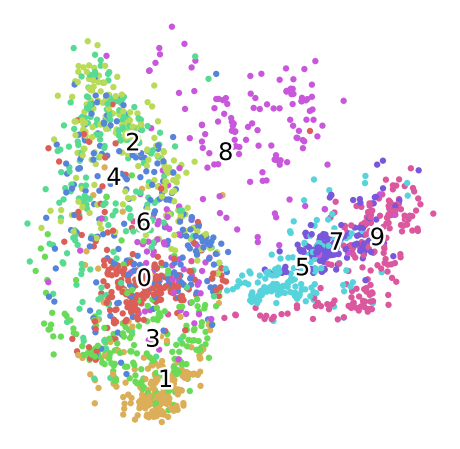

In [ ]:
fashion_scatter(fashion_isomap, y_subset)

## UMAP
UMAP is not suited for linear dataset as shown in the below plots.

In [ ]:
!pip install umap-learn

import umap

In [ ]:
df_split = df_umap.head(30000)
train = df_split.drop('label', 1)
train_labels = df_split['label']
data = np.array(train, dtype=np.float64)
target = train_labels
classes = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot']

In [ ]:
emb = umap.UMAP(n_neighbors=5).fit_transform(data, y=target)
emb

array([[ 8.356932 ,  8.510588 ],
       [-3.489055 , 11.343489 ],
       [12.259975 , 10.515795 ],
       ...,
       [-3.5008051, 10.9601   ],
       [-3.134325 , 11.578651 ],
       [17.906544 ,  7.739066 ]], dtype=float32)

Text(0.5, 1.0, 'UMAP')

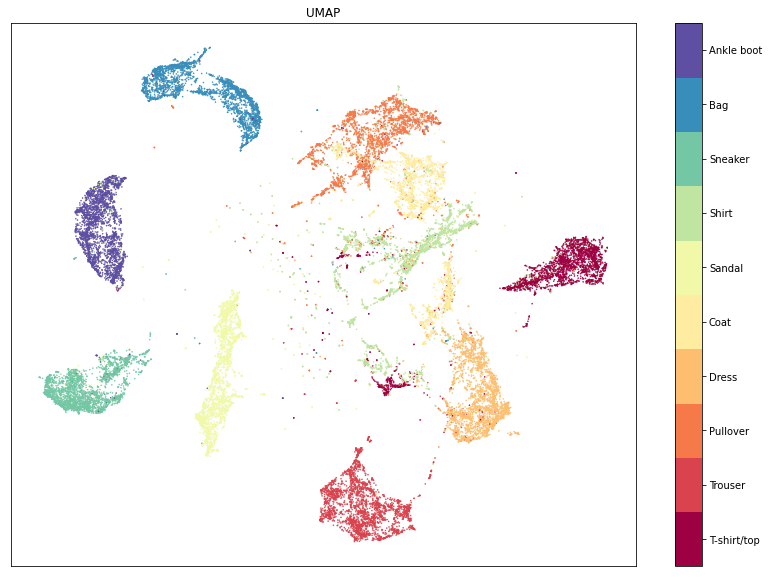

In [ ]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*emb.T, s=0.3, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(10))
cbar.set_ticklabels(classes)
plt.title('UMAP')

For the fashion dataset  both t-sne and ISOMAP is helpful for dimesionality reduction. ISOMAP defines the boundry well for our features